# Proyecto individual, segunda parte: EDA Y ML. 

In [550]:
#Importacion de librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
import ast


In [551]:
#Leemos el archivo csv como df
df=pd.read_csv('movies_dataset.csv') 


C:\Users\agusv\AppData\Local\Temp\ipykernel_3288\412972635.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_dataset.csv')


In [552]:
df.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'vote_count', 'poster_path', 'homepage'], inplace = True)
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average'],
      dtype='object')

In [553]:
df.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7


### 4) EDA

In [554]:
# Resumen estadistico de las columnas numericas
df.describe()

,revenue,runtime,vote_average
count,4.546000e+04,45203.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207
std,6.433225e+07,38.407810,1.924216
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000
50%,0.000000e+00,95.000000,6.000000
75%,0.000000e+00,107.000000,6.800000
max,2.787965e+09,1256.000000,10.000000


In [555]:
# Resumen de las columnas no numericas 
df.describe(include=['O'])

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4494,45466,45466,45466,45455,44512,45461,45463,45463,45379,45460,45379,20412,45460
unique,1698,1226,4069,45436,92,44307,44176,22708,2393,17336,1931,6,20283,42277
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",141971,en,No overview found.,0.0,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella
freq,29,36573,5000,3,32269,133,34,11875,17851,136,22395,45014,7,11


In [558]:
# Convertimos la columna 'genres' de string a lista de diccionarios
df['genres'] = df['genres'].apply(ast.literal_eval)
# Extraemos el nombre de cada genero y cramos una nueva columna con la lista de nombres de generos
df['genre_names'] = df['genres'].apply(lambda x: [d['name'] for d in x])
# Expandimos la lista de nombres de géneros
generos_expandidos = df['genre_names'].explode()
# Contamos la frecuencia de cada valor en la columna 'genre_names'
conteo_generos = generos_expandidos.value_counts()
# Eliminamos los géneros que solo aparecen una vez
conteo_generos = conteo_generos[conteo_generos > 1]

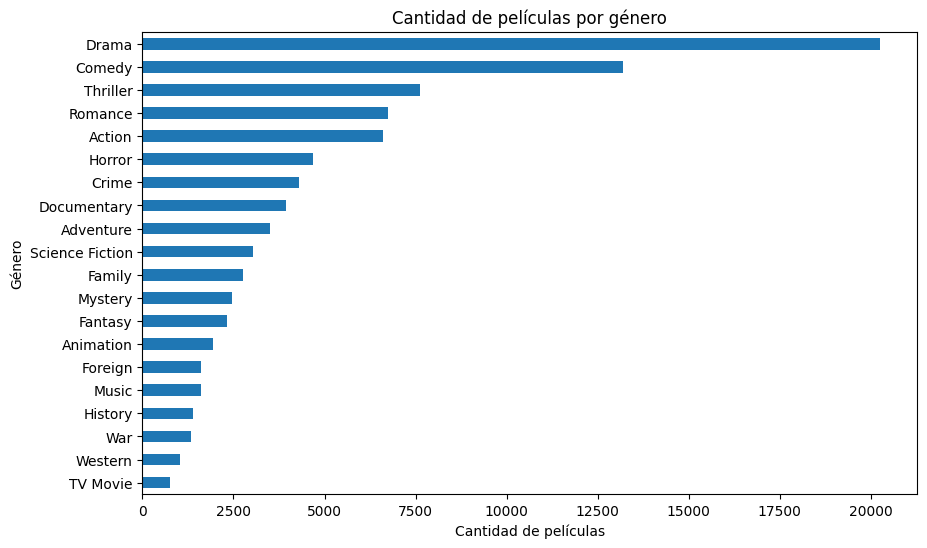

In [559]:
# Grafico para ver la cantidad de peliculas por genero
conteo_generos = conteo_generos.sort_values()  # Ordenamos los géneros por cantidad de películas

plt.figure(figsize=(10,6)) 
conteo_generos.plot(kind='barh')  # Creamos un gráfico de barras horizontales
plt.title('Cantidad de películas por género')  # Añadimos un título al gráfico
plt.xlabel('Cantidad de películas')  # Añadimos un título al eje x
plt.ylabel('Género')  # Añadimos un título al eje y
plt.show()  # Mostramos el gráfico

In [560]:
df[["genre_names"]]

,genre_names
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
45461,"[Drama, Family]"
45462,[Drama]
45463,"[Action, Drama, Thriller]"
45464,[]


In [561]:
df.shape

(45466, 18)

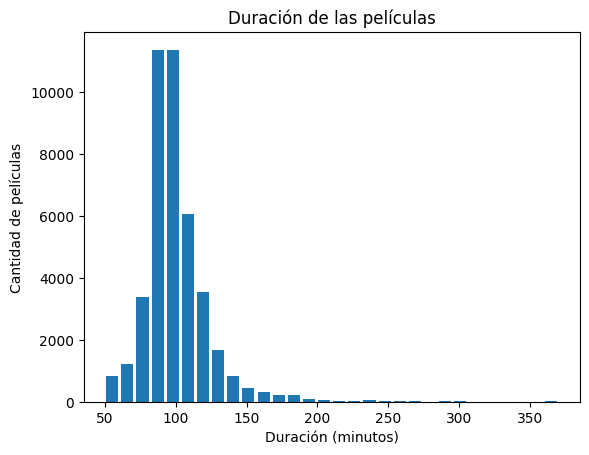

In [562]:
# Duracion de las peliculas
df_filtered = df[(df['runtime'] >= 50) & (df['runtime'] <= 380)]

df_filtered['runtime'].plot(kind='hist', rwidth=0.8, bins=30)

plt.title('Duración de las películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de películas')

plt.show()

# Machine learning

In [563]:
#pip install nltk

In [564]:
# Convertir todos los valores en la columna 'overview' a strings
df['overview'] = df['overview'].astype(str)

In [565]:
# Concatenamos todas las descripciones de las películas en una sola cadena de texto
# Utilizamos astype para asegurarnos de que todos los valores son cadenas de texto
text = ' '.join(df['overview'].astype(str))

In [566]:
df.shape

(45466, 18)

In [567]:
"""import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Descarga las stop words de NLTK si aún no lo has hecho
nltk.download('stopwords')
nltk.download('wordnet')

# Crea el lematizador
lemmatizer = WordNetLemmatizer()

# Define las stop words 
stop_words = set(stopwords.words('english'))

# Crea una lista de palabras, excluyendo las stop words y lematizando
words = [lemmatizer.lemmatize(word) 
         for word in nltk.word_tokenize(" ".join(df['overview']).lower()) 
         if word.isalpha() and word not in stop_words]

# Imprime las 15 palabras más comunes
print(Counter(words).most_common(15))"""

'import nltk\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\nfrom collections import Counter\n\n# Descarga las stop words de NLTK si aún no lo has hecho\nnltk.download(\'stopwords\')\nnltk.download(\'wordnet\')\n\n# Crea el lematizador\nlemmatizer = WordNetLemmatizer()\n\n# Define las stop words \nstop_words = set(stopwords.words(\'english\'))\n\n# Crea una lista de palabras, excluyendo las stop words y lematizando\nwords = [lemmatizer.lemmatize(word) \n         for word in nltk.word_tokenize(" ".join(df[\'overview\']).lower()) \n         if word.isalpha() and word not in stop_words]\n\n# Imprime las 15 palabras más comunes\nprint(Counter(words).most_common(15))'

* 'Life' es la palabra más común, lo que sugiere que muchas películas tratan sobre aspectos de la vida humana.
* Palabras como 'one', 'young', 'man', 'woman', 'friend' sugieren temas de desarrollo personal, crecimiento y relaciones interpersonales.
* 'Find' y 'get' podrían indicar temas de búsqueda, ya sea literal o figurativamente.
* 'Film' y 'story' son palabras esperadas en descripciones de películas.
* 'Love', 'family' y 'world' son temas comunes en muchas películas.

In [568]:

# Elimina los duplicados basándote en la columna 'title'
df = df.drop_duplicates(subset='title')

# Recrea el índice de los títulos luego de eliminar los duplicados
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


# Ahora puedes trabajar con df_sample que es una versión más pequeña de tus datos
df.shape

(42278, 18)

In [569]:
# Convierte las columnas a float
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Ordena por popularidad y toma las primeras 5000 filas
df_popular = df.sort_values(by='popularity', ascending=False).head(10000)

# Ordena por vote_average y toma las primeras 5000 filas
df_highly_rated = df.sort_values(by='vote_average', ascending=False).head(10000)


In [570]:
df_popular.shape

(10000, 18)

In [571]:

df_popular = df_popular.sort_values(by='popularity', ascending=False).head(10000).reset_index(drop=True)


## Recomendacion de peliculas por popularidad: df_popular

In [572]:
"""from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer

# Aseguramos que los datos de la columna 'overview' sean strings
df_popular['overview'] = df_popular['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'genres' sean strings
df_popular['genres'] = df_popular['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

# Reemplazar los valores NaN con cadenas vacías en la columna 'production_companies'
df_popular['production_companies'] = df_popular['production_companies'].fillna('')

# Convertir la columna 'production_companies' a string si es necesario
df_popular['production_companies'] = df_popular['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Crear una nueva columna combinando las características de interés
df_popular['combined_features'] = df_popular['overview'] + ' ' + df_popular['genres'] + ' ' + df_popular['production_companies']

# Convertimos todos los textos a minúsculas para evitar duplicados
df_popular['combined_features'] = df_popular['combined_features'].str.lower()

# Inicializamos el HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2000)

# Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(df_popular['combined_features'])

# Calculamos la similitud del coseno
cosine_sim = cosine_similarity(hash_matrix)

# Creamos un índice con los títulos de las películas
indices = pd.Series(df_popular.index, index=df_popular['title']).drop_duplicates()"""

"from sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.metrics.pairwise import cosine_similarity\nfrom sklearn.feature_extraction.text import HashingVectorizer\n\n# Aseguramos que los datos de la columna 'overview' sean strings\ndf_popular['overview'] = df_popular['overview'].fillna('').astype('str')\n\n# Aseguramos que los datos de la columna 'genres' sean strings\ndf_popular['genres'] = df_popular['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')\n\n# Reemplazar los valores NaN con cadenas vacías en la columna 'production_companies'\ndf_popular['production_companies'] = df_popular['production_companies'].fillna('')\n\n# Convertir la columna 'production_companies' a string si es necesario\ndf_popular['production_companies'] = df_popular['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)\n\n# Crear una nueva columna combinando las características de interés\ndf_popular['combined_features'] = df_

In [573]:
"""def recomendacion2(title, cosine_sim=cosine_sim):
    if title not in df_popular['title'].values:
        return 'La película no se encuentra en el conjunto de datos de muestra.'
    else:
        # Obtiene el índice de la película que coincide con el título
        idx = indices[title]

        # Obtiene las puntuaciones de similitud de todas las películas con la película dada
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordena las películas en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtiene las puntuaciones de las 5 películas más similares
        sim_scores = sim_scores[1:6]

        # Obtiene los índices de las películas
        movie_indices = [i[0] for i in sim_scores]

        # Devuelve las 5 películas más similares
        return df_popular['title'].iloc[movie_indices]

print(recomendacion2("Toy Story"))
recomendacion2("Jumanji")
print(recomendacion2("Titanic"))"""

'def recomendacion2(title, cosine_sim=cosine_sim):\n    if title not in df_popular[\'title\'].values:\n        return \'La película no se encuentra en el conjunto de datos de muestra.\'\n    else:\n        # Obtiene el índice de la película que coincide con el título\n        idx = indices[title]\n\n        # Obtiene las puntuaciones de similitud de todas las películas con la película dada\n        sim_scores = list(enumerate(cosine_sim[idx]))\n\n        # Ordena las películas en función de las puntuaciones de similitud\n        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)\n\n        # Obtiene las puntuaciones de las 5 películas más similares\n        sim_scores = sim_scores[1:6]\n\n        # Obtiene los índices de las películas\n        movie_indices = [i[0] for i in sim_scores]\n\n        # Devuelve las 5 películas más similares\n        return df_popular[\'title\'].iloc[movie_indices]\n\nprint(recomendacion2("Toy Story"))\nrecomendacion2("Jumanji")\nprint(recome

## df_popular:
* Este DataFrame parece dar recomendaciones más variadas. En algunos casos, las películas recomendadas parecen tener poco en común con la película original (por ejemplo, las recomendaciones para "Titanic" y "Avatar"). Sin embargo, para "Toy Story", las recomendaciones son muy relevantes ya que todas son de la misma franquicia o de cortos relacionados.

Recomendacion de peliculas por vote_Average

In [574]:
df_highly_rated = df_highly_rated.sort_values(by='popularity', ascending=False).head(10000).reset_index(drop=True)


In [575]:
df_highly_rated.shape

(10000, 18)

In [576]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer

# Aseguramos que los datos de la columna 'overview' sean strings
df_highly_rated['overview'] = df_highly_rated['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'genres' sean strings
df_highly_rated['genres'] = df_highly_rated['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

# Reemplazar los valores NaN con cadenas vacías en la columna 'production_companies'
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].fillna('')

# Convertir la columna 'production_companies' a string si es necesario
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Crear una nueva columna combinando las características de interés
df_highly_rated['combined_features'] = df_highly_rated['overview'] + ' ' + df_highly_rated['genres'] + ' ' + df_highly_rated['production_companies']

# Convertimos todos los textos a minúsculas para evitar duplicados
df_highly_rated['combined_features'] = df_highly_rated['combined_features'].str.lower()

# Inicializamos el HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2000)

# Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(df_highly_rated['combined_features'])

# Calculamos la similitud del coseno
cosine_sim = cosine_similarity(hash_matrix)

# Creamos un índice con los títulos de las películas
indices = pd.Series(df_highly_rated.index, index=df_highly_rated['title']).drop_duplicates()

In [577]:
def recomendacion(title, cosine_sim=cosine_sim):
    if title not in df_highly_rated['title'].values:
        return 'La película no se encuentra en el conjunto de datos de muestra.'
    else:
        # Obtiene el índice de la película que coincide con el título
        idx = indices[title]

        # Obtiene las puntuaciones de similitud de todas las películas con la película dada
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordena las películas en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtiene las puntuaciones de las 5 películas más similares
        sim_scores = sim_scores[1:6]

        # Obtiene los índices de las películas
        movie_indices = [i[0] for i in sim_scores]

        # Devuelve las 5 películas más similares
        return df_highly_rated['title'].iloc[movie_indices]




print(recomendacion("Toy Story"))
print(recomendacion("Jumanji"))
print(recomendacion("Avatar"))
print(recomendacion("Titanic"))

205              Toy Story 3
190              Toy Story 2
700        Hawaiian Vacation
9498             Cheburashka
9547    Hemo The Magnificent
Name: title, dtype: object
5275       Princes and Princesses
325                      Stardust
997     The City of Lost Children
840            Dancer in the Dark
1386                  Melancholia
Name: title, dtype: object
6329                X-Men: First Class
22      Rise of the Planet of the Apes
67          X-Men: Days of Future Past
115                    Minority Report
11                     The Maze Runner
Name: title, dtype: object
541                                    Room
1882                         Cinderella Man
176     The Curious Case of Benjamin Button
11                          The Maze Runner
5628                      This Is My Affair
Name: title, dtype: object


## df_highly_rated: 
* Este DataFrame parece dar recomendaciones más consistentes. Las películas recomendadas tienden a ser altamente valoradas y, en algunos casos, parecen compartir similitudes temáticas o de género con la película original (por ejemplo, las recomendaciones para "Avatar" y "Jumanji").